### Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Training Dataset

In [ ]:
# Importing Training Data
train = pd.read_csv('/content/drive/MyDrive/Software Engineering Project/kaggle-mnist/sign_mnist_train/sign_mnist_train.csv')

### Loading the Test Dataset

In [ ]:
# Importing Test Data
test = pd.read_csv('/content/drive/MyDrive/Software Engineering Project/kaggle-mnist/sign_mnist_test/sign_mnist_test.csv')

### Preprocessing the Training Data

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


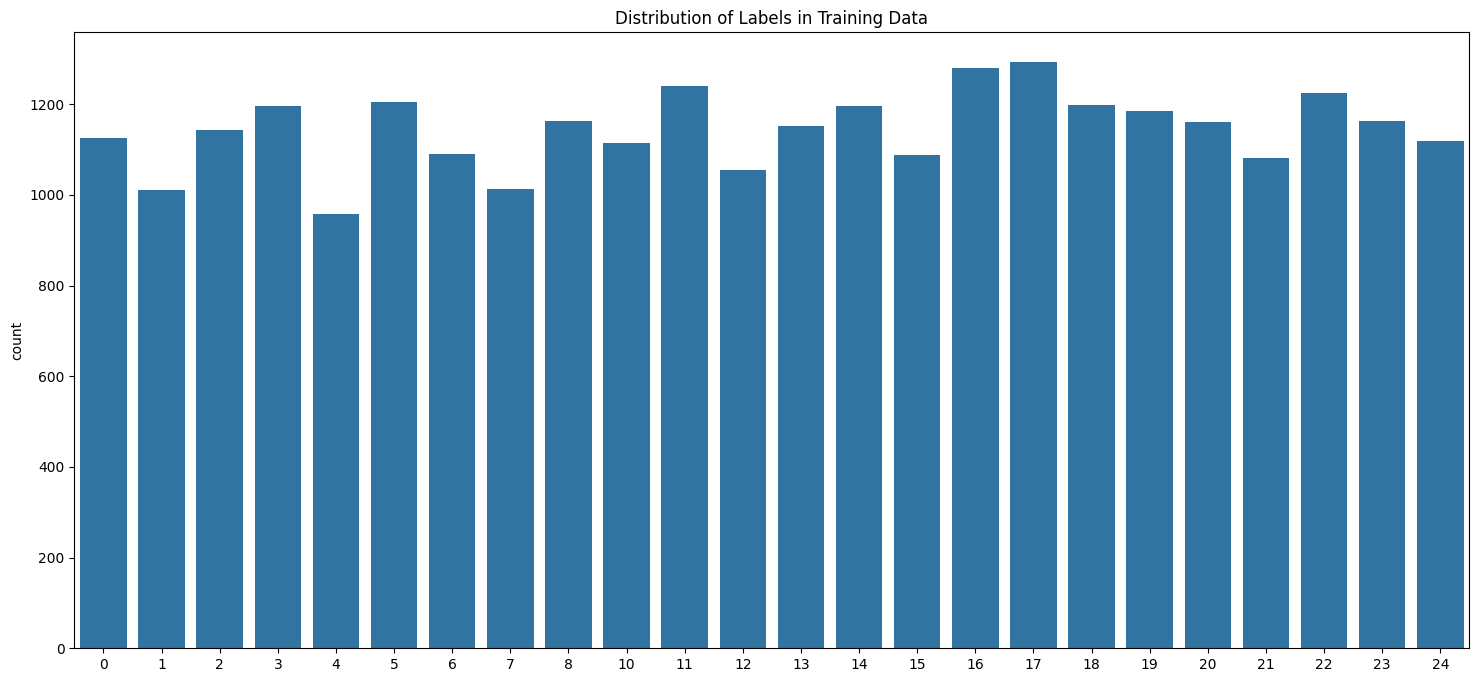

In [ ]:
# Extract labels (target values) from the dataset
labels = train['label'].values

# View unique label values
unique_val = np.array(labels)
print(np.unique(unique_val))

# Plot the number of samples per class
plt.figure(figsize = (18,8))
sns.countplot(x = labels)
plt.title("Distribution of Labels in Training Data")

# Drop Training labels from training data
train.drop('label', axis = 1, inplace = True)

# Extract Image Data from each row
# Convert each row (flattened 28x28 image) into a 28x28 array
images = train.values
images = np.array([np.reshape(i, (28,28)) for i in images])
images = np.array([i.flatten() for i in images])

# One-hot encode our labels
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

### Data Splitting

In [ ]:
# Split the data into training and testing sets (90% training, 10% testing)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1, random_state = 101)

### Model Setup

In [ ]:
### Importing Keras Modules for CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

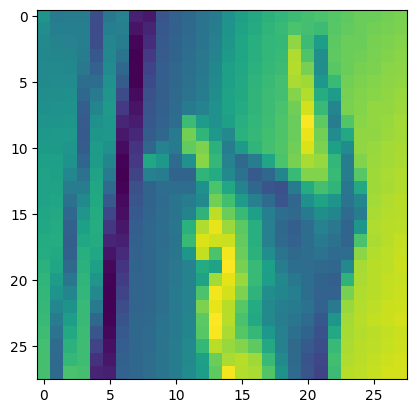

In [ ]:
# Setting batch size, number of classes (24 letters), and number of epochs for training
batch_size = 128
num_classes = 24
epochs = 10

# Scale image pixel values to [0, 1] by dividing by 255
x_train = x_train / 255
x_test = x_test / 255

# Reshaping images to fit TensorFlow and Keras input format (28x28 images with 1 color channel)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Displaying the first training image to verify the data format
plt.imshow(x_train[0].reshape(28, 28))

In [ ]:
# Define CNN Model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Reduces spatial dimensions

# Second Convolutional Layer
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layers
model.add(Flatten())  # Convert 2D features to 1D
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))  # Prevents overfitting

# Output Layer (Softmax for Multi-class Classification)
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Display model summary
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 405,656 (1.55 MB)

 Trainable params: 405,656 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.1808 - loss: 2.7143 - val_accuracy: 0.7396 - val_loss: 0.8658
Epoch 2/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7255 - loss: 0.8303 - val_accuracy: 0.9071 - val_loss: 0.3392
Epoch 3/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8801 - loss: 0.3624 - val_accuracy: 0.9243 - val_loss: 0.2166
Epoch 4/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9340 - loss: 0.2011 - val_accuracy: 0.9927 - val_loss: 0.0498
Epoch 5/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9791 - loss: 0.0761 - val_accuracy: 0.9996 - val_loss: 0.0179
Epoch 6/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9877 - loss: 0.0484 - val_accuracy: 0.9996 - val_loss: 0.0112
Epoch 7/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9941 - loss: 0.0271 - val_accuracy: 0.9985 - val_loss: 0.0117
Epoch 8/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9943 - loss: 0.0248 - val_accuracy: 

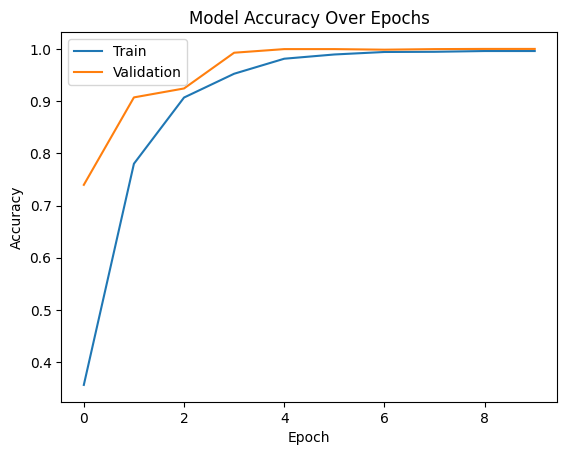

In [ ]:
# Train the CNN Model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=epochs,
                    batch_size=batch_size)

# Plot Accuracy Trends
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy Over Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

### Preparing Test Data for Model Evaluation

In [ ]:
# Extract labels from test data
test_labels = test['label'].values

# Remove labels from test data, keeping only pixel values
test.drop('label', axis=1, inplace=True)

# Convert test data to NumPy array and reshape into 28x28 pixel images
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])  # Convert each row into a 28x28 matrix
test_images = np.array([i.flatten() for i in test_images])  # Flatten again for consistency

# One-hot encode test labels
test_labels = label_binrizer.fit_transform(test_labels)

# Reshape images to match CNN input format (28x28 with 1 color channel)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Output shape of the reshaped test images
test_images.shape

(7172, 28, 28, 1)

## Hyperparameter Tuning with Keras Tuner

### **Tunable Hyperparameters:**
1. **Number of filters** in three Conv2D layers (varies within defined ranges).
2. **Number of neurons** in the Dense layer.
3. **Dropout rate** to prevent overfitting.
4. **Learning rate** for the Adam optimizer.

In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.7 MB/s eta 0:00:00


Define the Model & Hyperparameters

In [ ]:
import keras_tuner as kt 

def build_model(hp):
    model = Sequential()

    # First convolutional layer with tunable filters
    model.add(Conv2D(
        filters=hp.Int('conv1_filters', min_value=32, max_value=256, step=32),
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(28, 28, 1)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional layer with tunable filters
    model.add(Conv2D(
        filters=hp.Int('conv2_filters', min_value=64, max_value=512, step=64),
        kernel_size=(3, 3),
        activation='relu')
    )
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third convolutional layer with tunable filters
    model.add(Conv2D(
        filters=hp.Int('conv3_filters', min_value=128, max_value=512, step=64),
        kernel_size=(3, 3),
        activation='relu')
    )
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Fully connected layer with tunable number of units
    model.add(Dense(
        units=hp.Int('dense_units', min_value=64, max_value=512, step=64),
        activation='relu')
    )
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0, max_value=0.6, step=0.05)))

    # Output layer (fixed number of classes)
    model.add(Dense(num_classes, activation='softmax'))

    # Tunable learning rate
    learning_rate = hp.Choice('learning_rate', values=[5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4])

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


Run Hyperband for Broad Exploration

In [ ]:
# Define the Hyperband tuner
hyperband_tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='hyperband_tuning',
    project_name='sign_mnist'
)

# Search for the best hyperparameters
hyperband_tuner.search(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=128)

# Get the best model from Hyperband
best_hyperband_model = hyperband_tuner.get_best_models(num_models=1)[0]

# Get the best hyperparameters
best_hyperparameters = hyperband_tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters from Hyperband:")
print(best_hyperparameters.values)


Trial 30 Complete [00h 00m 59s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 20m 59s
Best Hyperparameters from Hyperband:
{'conv1_filters': 192, 'conv2_filters': 320, 'conv3_filters': 320, 'dense_units': 320, 'dropout_rate': 0.5, 'learning_rate': 0.001, 'tuner/epochs': 7, 'tuner/initial_epoch': 3, 'tuner/bracket': 2, 'tuner/round': 1, 'tuner/trial_id': '0007'}


Use Bayesian Optimization for Fine-Tuning

In [ ]:
bayesian_tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    directory='bayesian_tuning',
    project_name='sign_mnist_finetune'
)

# Start Bayesian Optimization
bayesian_tuner.search(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=128)

# Get the best refined model
best_bayesian_model = bayesian_tuner.get_best_models(num_models=1)[0]

# Print the best hyperparameters from Bayesian Optimization
best_bayesian_hyperparameters = bayesian_tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters from Bayesian Optimization:")
print(best_bayesian_hyperparameters.values)


Trial 20 Complete [00h 00m 55s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 27m 59s
Best Hyperparameters from Bayesian Optimization:
{'conv1_filters': 64, 'conv2_filters': 64, 'conv3_filters': 384, 'dense_units': 320, 'dropout_rate': 0.25, 'learning_rate': 0.001}


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Train the Final Model

Epoch 1/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9953 - loss: 0.0174 - val_accuracy: 0.9985 - val_loss: 0.0052
Epoch 2/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9937 - loss: 0.0197 - val_accuracy: 0.9993 - val_loss: 0.0031
Epoch 3/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9989 - loss: 0.0047 - val_accuracy: 0.9985 - val_loss: 0.0052
Epoch 4/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9982 - loss: 0.0065 - val_accuracy: 0.9989 - val_loss: 0.0036
Epoch 5/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9978 - loss: 0.0086 - val_accuracy: 0.9395 - val_loss: 0.3808
Epoch 6/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9764 - loss: 0.1027 - val_accuracy: 1.0000 - val_loss: 3.0354e-04
Epoch 7/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 2.7939e-04
Epoch 8/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9999 - loss: 9.7189e-04 - val

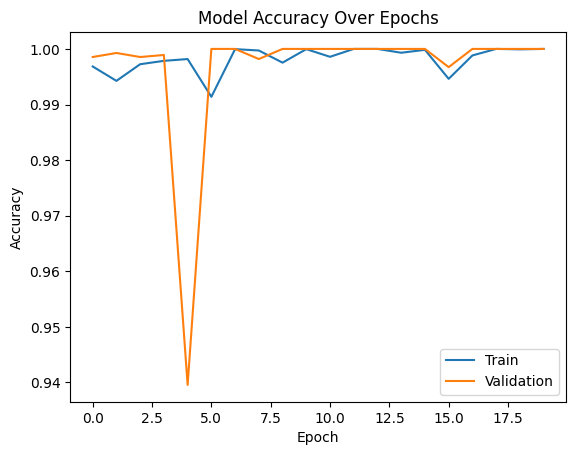

In [ ]:
final_model = best_bayesian_model

# Train the final model
history = final_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=128)

# Plot accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy Over Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()


In [ ]:
print(final_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 384)           │         221,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 320)                 │         123,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │           7,704 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,170,122 (4.46 MB)

 Trainable params: 390,040 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 780,082 (2.98 MB)

None


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Get model predictions
y_pred = final_model.predict(x_test)

# Convert predictions from probabilities to class labels
y_pred_classes = y_pred.argmax(axis=1)  # Get index of max probability
y_true_classes = y_test.argmax(axis=1)  # Convert one-hot to class labels


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
# Compute metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# Print results
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

# Print full classification report
print("\nClassification Report:\n", classification_report(y_true_classes, y_pred_classes))


✅ Accuracy: 1.0000
✅ Precision: 1.0000
✅ Recall: 1.0000
✅ F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00       103
           3       1.00      1.00      1.00       133
           4       1.00      1.00      1.00       105
           5       1.00      1.00      1.00       116
           6       1.00      1.00      1.00       101
           7       1.00      1.00      1.00       111
           8       1.00      1.00      1.00       104
           9       1.00      1.00      1.00       123
          10       1.00      1.00      1.00       104
          11       1.00      1.00      1.00       109
          12       1.00      1.00      1.00       125
          13       1.00      1.00      1.00       123
          14       1.00      1.00      1.00        90
          15       1.00      1.00  

In [ ]:
# Save model
final_model.save('sign_language_model.h5')

# To load the model later
from tensorflow.keras.models import load_model
loaded_model = load_model('sign_language_model.h5')


In [ ]:
# To load the model later
from tensorflow.keras.models import load_model
loaded_model = load_model('sign_language_model.h5')

In [ ]:
# Predict on x_test
y_pred_x_test = final_model.predict(x_test)

# Convert predictions to class labels
y_pred_x_test_classes = y_pred_x_test.argmax(axis=1)
y_true_x_test_classes = y_test.argmax(axis=1)

# Compute metrics for x_test
accuracy_x_test = accuracy_score(y_true_x_test_classes, y_pred_x_test_classes)
precision_x_test = precision_score(y_true_x_test_classes, y_pred_x_test_classes, average='weighted')
recall_x_test = recall_score(y_true_x_test_classes, y_pred_x_test_classes, average='weighted')
f1_x_test = f1_score(y_true_x_test_classes, y_pred_x_test_classes, average='weighted')

print(f"📊 Evaluation on `x_test` (held-out training data):")
print(f"✅ Accuracy: {accuracy_x_test:.4f}")
print(f"✅ Precision: {precision_x_test:.4f}")
print(f"✅ Recall: {recall_x_test:.4f}")
print(f"✅ F1 Score: {f1_x_test:.4f}\n")


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
📊 Evaluation on `x_test` (held-out training data):
✅ Accuracy: 1.0000
✅ Precision: 1.0000
✅ Recall: 1.0000
✅ F1 Score: 1.0000



In [ ]:
# Normalize test_images
test_images = test_images / 255.0

# Predict on test_images
y_pred_test_images = final_model.predict(test_images)

# Convert predictions to class labels
y_pred_test_images_classes = y_pred_test_images.argmax(axis=1)
y_true_test_images_classes = test_labels.argmax(axis=1)

# Compute metrics for test_images
accuracy_test_images = accuracy_score(y_true_test_images_classes, y_pred_test_images_classes)
precision_test_images = precision_score(y_true_test_images_classes, y_pred_test_images_classes, average='weighted')
recall_test_images = recall_score(y_true_test_images_classes, y_pred_test_images_classes, average='weighted')
f1_test_images = f1_score(y_true_test_images_classes, y_pred_test_images_classes, average='weighted')

print(f"📊 Evaluation on `test_images` (completely unseen dataset):")
print(f"✅ Accuracy: {accuracy_test_images:.4f}")
print(f"✅ Precision: {precision_test_images:.4f}")
print(f"✅ Recall: {recall_test_images:.4f}")
print(f"✅ F1 Score: {f1_test_images:.4f}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
📊 Evaluation on `test_images` (completely unseen dataset):
✅ Accuracy: 0.9566
✅ Precision: 0.9590
✅ Recall: 0.9566
✅ F1 Score: 0.9567


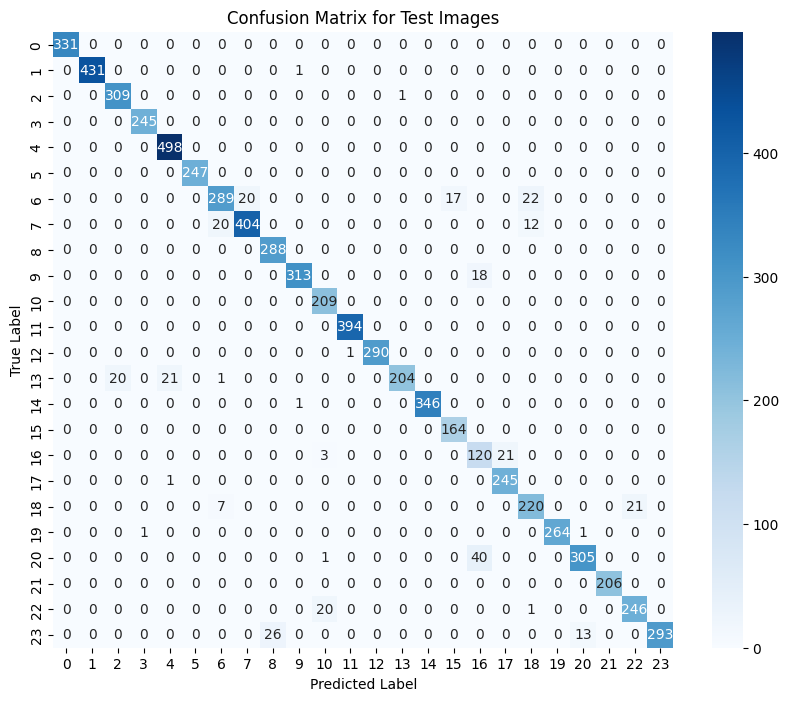

In [ ]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_test_images_classes, y_pred_test_images_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true_test_images_classes), yticklabels=np.unique(y_true_test_images_classes))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Test Images")
plt.show()
